In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [2]:
data = pd.read_csv("003 1.02.Multiple-linear-regression[UdemyIran.Com].csv")

In [3]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [5]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           6.58e-10
Time:                        12:51:38   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
raw_data = pd.read_csv("018 1.03.Dummies[UdemyIran.Com].csv")

In [9]:
raw_data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [10]:
data1 = raw_data.copy()

In [11]:
data1['Attendance'] = data1['Attendance'].map({'Yes':1, 'No':0})

In [12]:
data1.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [14]:
data1.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [15]:
y = data1['GPA']
x1 = data1[['SAT', 'Attendance']]

In [16]:
x = sm.add_constant(x1)
results1 = sm.OLS(y, x).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.19e-15
Time:                        13:17:11   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

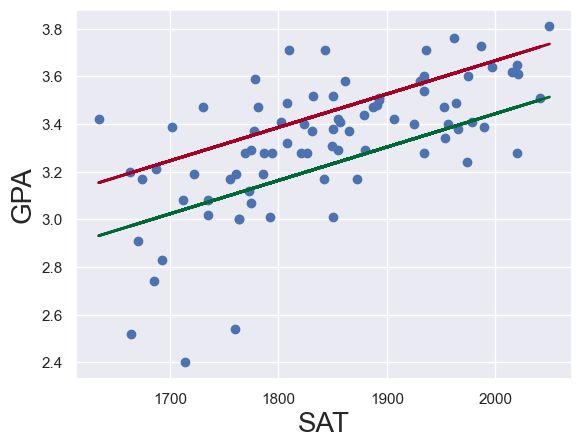

In [22]:
plt.scatter(data1['SAT'], y)
yhat_no = 0.6439 + 0.0014*data1['SAT']
yhat_yes = 0.8665 + 0.0014*data1['SAT']
fig = plt.plot(data1['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data1['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

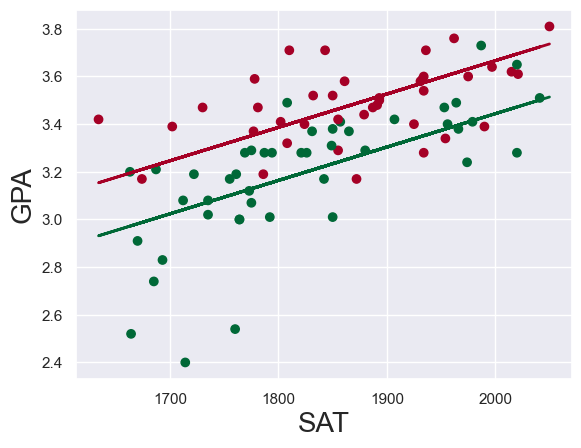

In [23]:
plt.scatter(data1['SAT'], y,c=data1["Attendance"],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data1['SAT']
yhat_yes = 0.8665 + 0.0014*data1['SAT']
fig = plt.plot(data1['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data1['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

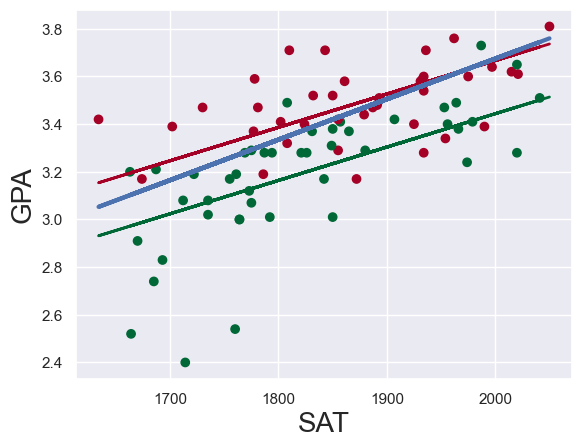

In [24]:
plt.scatter(data1['SAT'], y,c=data1["Attendance"],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data1['SAT']
yhat_yes = 0.8665 + 0.0014*data1['SAT']
yhat = 0.0017*data1['SAT'] + 0.275
fig = plt.plot(data1['SAT'], yhat_no, lw=2, c='#006837', label='regression line1')
fig = plt.plot(data1['SAT'], yhat_yes, lw=2, c='#a50026', label='regression line2')
fig = plt.plot(data1['SAT'], yhat, lw=3, c='#4C72B0', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## How to predictions based on the regressions we create

In [25]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [26]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [28]:
predictions = results1.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [29]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [30]:
real_state = pd.read_csv('005 real-estate-price-size-year[UdemyIran.Com].csv')

In [31]:
real_state.head(10)

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
5,245050.280,575.19,2006
6,265129.064,570.89,2015
7,175716.480,620.82,2006
8,331101.344,682.26,2018
9,218630.608,694.52,2009


In [33]:
real_state.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [35]:
y = real_state['price']
x1 = real_state[['size', 'year']]

In [36]:
x = sm.add_constant(x1)
real_state_results = sm.OLS(y, x).fit()

In [38]:
real_state_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.77e-32
Time:                        13:55:12   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
real_state_dummy = pd.read_csv('019 real-estate-price-size-year-view[UdemyIran.Com].csv')

In [40]:
real_state_dummy.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [42]:
real_state_dummy1 = real_state_dummy.copy()

In [43]:
real_state_dummy1['view'] = real_state_dummy1['view'].map({'Sea view':1, 'No sea view':0})

In [44]:
real_state_dummy1.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [45]:
y = real_state_dummy['price']
x1 = real_state_dummy1[['size', 'year', 'view']]

In [46]:
x = sm.add_constant(x1)
results2 = sm.OLS(y, x).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.02e-50
Time:                        14:02:51   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""